# Spam Detector

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv](https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive-beta.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [ ]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct!

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

<Axes: xlabel='char_freq_$', ylabel='capital_run_length_average'>

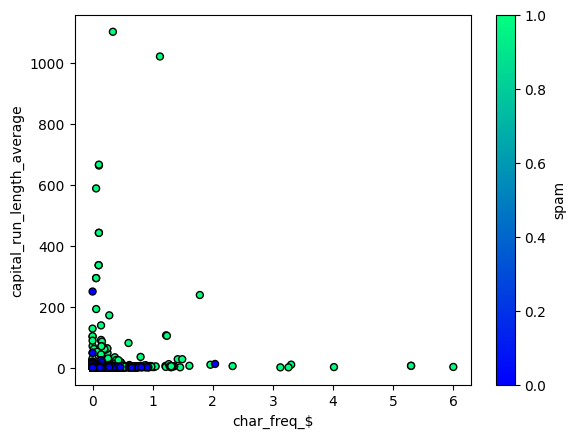

In [ ]:
data.plot.scatter(
    x='char_freq_$',
    y='capital_run_length_average',
    c='spam',
    marker='o',
    s=25,
    edgecolor='k',
    colormap="winter"
)

**Prediction** - Reviewing the data, the target column “spam” has a binary discrete outcome.
( 0 for not spam and 1 for spam).
Depending on the Type, Size and Complexity of the data it looks like a non-linear data and the number of independent variables (features) are high.
Picked a couple of columns and plot the data. If you notice there is overlap of datapoints.. confirming that it is non-linear data.

So in cases of non-linear data, Decision trees with Random Forest tend to perform better with higher accuracy.  So my prediction is accuracy will be better with **Random Forest algorithm**

## Split the Data into Training and Testing Sets

In [ ]:
# Create the labels set `y` and features DataFrame `X`

X = data.copy()
y = data['spam']

X = X.drop(columns='spam')


In [ ]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [ ]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1286,0.00,0.39,0.99,0.0,0.39,0.0,0.19,0.00,0.19,0.19,...,0.0,0.000,0.074,0.000,0.174,0.548,0.0,4.965,97,993
3844,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,14.000,53,56
1658,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.121,0.605,0.000,0.000,0.000,0.0,2.222,22,100
1038,0.54,0.00,0.00,0.0,2.16,0.0,0.00,0.54,0.00,1.08,...,0.0,0.000,0.051,0.000,0.000,0.000,0.0,1.490,19,82
947,0.00,0.65,0.00,0.0,0.65,0.0,1.31,0.00,0.00,0.00,...,0.0,0.000,0.000,0.104,0.522,0.000,0.0,1.690,11,71


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance

scaler = StandardScaler()


In [ ]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [ ]:
# Scale the training data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like.

In [ ]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

#Declare a logistic regression model
#Applying a random state of 7 and max iterations of 100
log_regression_model = LogisticRegression(random_state=7, max_iter=100)

#Fit and save the logistic regression model using the training data
log_regression_model.fit(X_train_scaled, y_train)

#Validate the model
print(f"Training Data Score: {log_regression_model.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {log_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9272463768115942
Test Data Score: 0.9192006950477846


In [ ]:
# Make and save testing predictions with the saved logistic regression model using the test data

log_test_predictions = log_regression_model.predict(X_test_scaled)

# Review the predictions
log_test_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
log_acc_score = accuracy_score(y_test, log_test_predictions)

print(f"Logarithmic Model Accuracy Score : {log_acc_score}")

Logarithmic Model Accuracy Score : 0.9192006950477846


In [ ]:
from sklearn.metrics import confusion_matrix

log_conf_matrix = confusion_matrix(y_test, log_test_predictions)

log_conf_matrix

array([[667,  38],
       [ 55, 391]])

<Axes: >

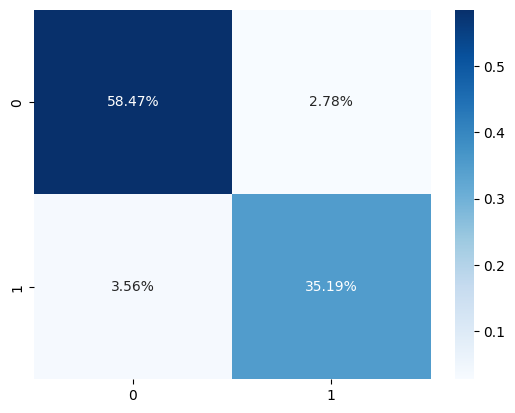

In [ ]:
import seaborn as sns
import numpy as np

sns.heatmap(log_conf_matrix/np.sum(log_conf_matrix), annot=True, fmt='.2%', cmap='Blues')



In [ ]:
from sklearn.metrics import classification_report

log_c_report = classification_report(y_test, log_test_predictions)

print(log_c_report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       705
           1       0.91      0.88      0.89       446

    accuracy                           0.92      1151
   macro avg       0.92      0.91      0.91      1151
weighted avg       0.92      0.92      0.92      1151



## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like.

In [ ]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

# Fit the model using the training data
rf_model.fit(X_train_scaled, y_train)

#Validate the model
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {rf_model.score(X_test_scaled, y_test)}")


Training Data Score: 0.9994202898550725
Test Data Score: 0.9582971329278888


In [ ]:
# Make and save testing predictions with the saved Random Forest model using the test data


rf_test_predictions = rf_model.predict(X_test_scaled)

# Review the predictions
rf_test_predictions


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
rf_acc_score = accuracy_score(y_test, rf_test_predictions)

print(f"Random Forest Model Accuracy Score : {rf_acc_score}")



Random Forest Model Accuracy Score : 0.9582971329278888


In [ ]:

rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

rf_conf_matrix

array([[685,  20],
       [ 28, 418]])

<Axes: >

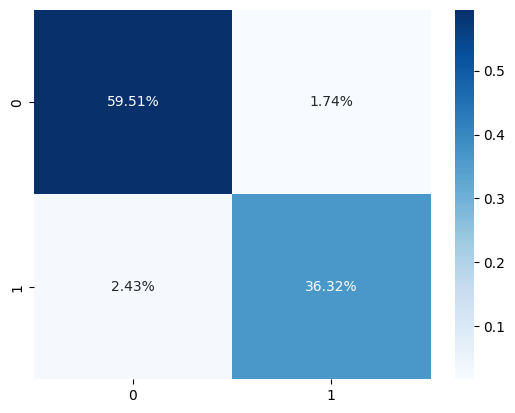

In [ ]:
sns.heatmap(rf_conf_matrix/np.sum(rf_conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
rf_c_report = classification_report(y_test, rf_test_predictions)

print(rf_c_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       705
           1       0.95      0.94      0.95       446

    accuracy                           0.96      1151
   macro avg       0.96      0.95      0.96      1151
weighted avg       0.96      0.96      0.96      1151



## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The Accuracy score (R2) of the Logistic Regression is 92%

The Accuracy score (R2) of the Random Forest Model is 95.8%

The Random Forest alogrithm performed better. This is inline with my Prediction.


After plotting the initial data there were overlap of datapoints. So concluded it is a non-linear data. (please refer to Prediction Cell for scatter plot)

So in cases of non-linear data, Decision trees with Random Forest tend to perform better with higher accuracy.

 Increasing the n_estimator parameter of the RandomForestClassifier beyond 100 did not significantly change the accuracy. So after trying a few higher values reverted back to 100.

 The Classification report also shows the higher precision for the RandomForest Algorithm
